# Analysis of global results

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


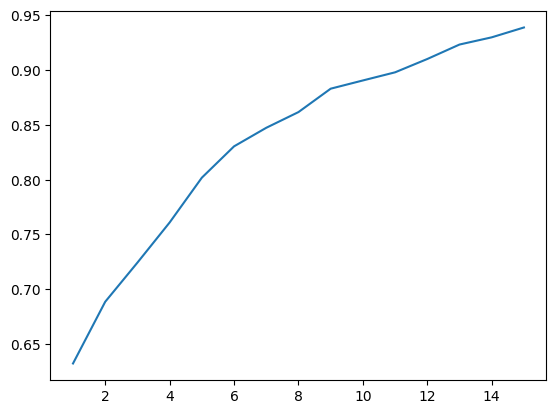

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt


def get_rocauc(dim):
    results = []
    for _ in range(50):
        # Set parameters
        N = 10_000 # number of samples for each class
        num_classes = 5 # number of classes

        # Generate mean values for each class
        mean_values = np.random.normal(loc=0, scale=0.5, size=(num_classes, dim))

        # Generate samples for each class
        samples = []
        labels = []
        for class_id, mean in enumerate(mean_values):
            samples_class = np.random.normal(loc=mean, scale=1.0, size=(N, dim))
            samples.append(samples_class)
            labels += [class_id]*N

        samples = np.concatenate(samples, axis=0)
        labels = np.array(labels)

        # Perform one-hot encoding of the class labels
        onehot_encoder = OneHotEncoder(sparse=False)
        labels_onehot = onehot_encoder.fit_transform(labels.reshape(-1, 1))

        # Split data into training and test sets
        train_samples, test_samples, train_labels, test_labels = train_test_split(samples, labels_onehot, test_size=0.3, random_state=42)

        # Fit logistic regression model
        lr = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=1000)
        lr.fit(train_samples, np.argmax(train_labels, axis=1))

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(num_classes):
            fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], lr.predict_proba(test_samples)[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(test_labels.ravel(), lr.predict_proba(test_samples).ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
        results += [roc_auc['micro']]
    return np.mean(results)

get_rocauc_vec = np.vectorize(get_rocauc)
dims = list(range(1, 16))
roc = get_rocauc_vec(dims)

plt.plot(dims, roc)

In [2]:
from numpy.linalg import norm

means = np.random.normal(loc=0, scale=0.5, size=(5, 16))
data = [np.random.normal(loc=mean, scale=1, size=(1000, 16)) for mean in means]

l = []
for x in data:
    for y in data:
        for i in range(x.shape[0]):
            for j in range(y.shape[0]):
                a, b = x[i], y[j]



a = data[0][0]
b = data[0][0]
a_norm, b_norm = norm(a), norm(b)

a.dot(b) / (a_norm * b_norm)

1.0000000000000002

In [3]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

means = np.random.normal(loc=0, scale=0.5, size=(3, 16))
data = [np.random.normal(loc=mean, scale=1, size=(1000, 16)) for mean in means]

ab_cos = cosine_similarity(data[0], data[1]).flatten()
ac_cos = cosine_similarity(data[0], data[2]).flatten()
bc_cos = cosine_similarity(data[1], data[2]).flatten()

<AxesSubplot: ylabel='Density'>

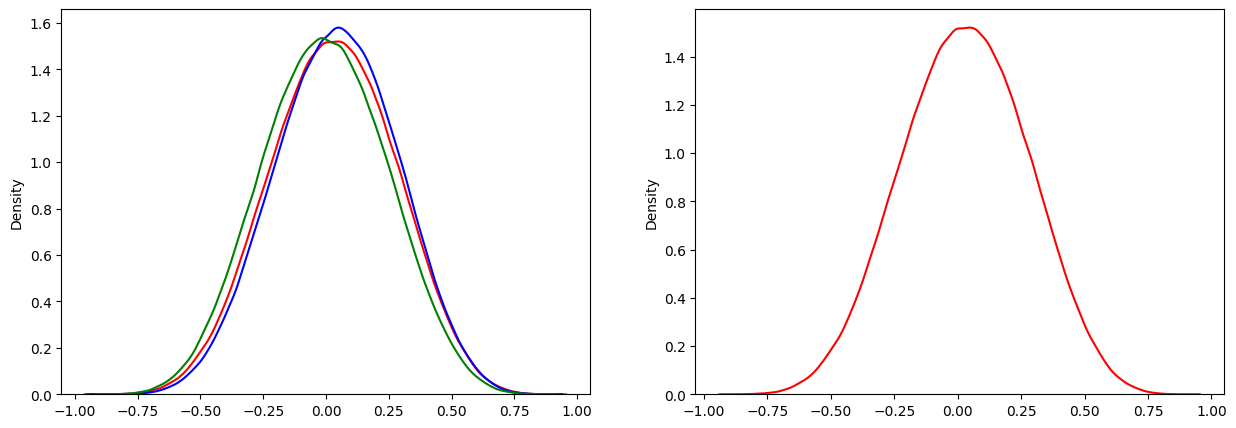

In [4]:
args = { 'fill': False }

_, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.kdeplot(x=ab_cos, color='red', ax=axs[0], **args)
sns.kdeplot(x=ac_cos, color='blue', ax=axs[0],**args)
sns.kdeplot(x=bc_cos, color='green', ax=axs[0],**args)
sns.kdeplot(x=ab_cos, color='red', ax=axs[1], **args)

In [5]:
import numpy as np
from numpy.linalg import norm

def cos(a, b):
    return (a @ b.T) / (norm(a, axis=1) * norm(b, axis=1))

data = [np.random.normal(loc=0, scale=0.5, size=(1000, 16)) for i in range(5)]

binary_cos = cos(data[0], data[0])
binary_cos[0, 1], binary_cos[1, 0]

(-0.3478962485188426, -0.20139183715180148)

In [6]:
from evaluation_utils import create_encoder_latex_table, unpivot_baseline_model, unpivot_ssl_model, read_multiple_global_results, ssl_method_to_category
from constants import MODE_1_PROCESSED_DIR, MODE_2_3_PROCESSED_DIR, TEST_METRIC, ENCODERS, TRAINING_SCHEMES, SSL_MODELS, BASELINES, AUXILIARY_ALL,\
    CONTRAST_ALL, HYBRID_ALL, GENERATION_ALL, BASELINES, model_abbreviations, FONT,\
    GENERATION_BASED_CATEGORY, HYBRID_CATEGORY, CONTRAST_BASED, AUXILIARY_CATEGORY, ENCODER_COLORS, SSL_CATEGORIES, TRAINING_SCHEMES, model_abbreviations_inv
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D

plt.rcParams["font.family"] = FONT

In [7]:
# Mode 1 and 2/3 raw
data = read_multiple_global_results(experiments=[
    ('Mode 1', MODE_1_PROCESSED_DIR),
    ('Mode 2/3', MODE_2_3_PROCESSED_DIR)
])

# SSL results
df_ssl = unpivot_ssl_model(df=data, suffix=TEST_METRIC, ssl_models=SSL_MODELS, encoders=ENCODERS, training_schemes=TRAINING_SCHEMES)
df_baseline = unpivot_baseline_model(df=data, suffix=TEST_METRIC, baseline_models=BASELINES, training_schemes=TRAINING_SCHEMES)

1.ndjson
2.ndjson
3.ndjson
4.ndjson
5.ndjson
6.ndjson
7.ndjson
8.ndjson
9.ndjson
10.ndjson
11.ndjson
concatenating
1.ndjson
2.ndjson
3.ndjson
4.ndjson
5.ndjson
6.ndjson
7.ndjson
8.ndjson
9.ndjson
10.ndjson
11.ndjson
12.ndjson
13.ndjson
14.ndjson
15.ndjson
16.ndjson
concatenating


In [8]:
df_ssl_means = df_ssl[df_ssl.Experiment == 'Mode 2/3'].groupby(['SSL_model', 'Encoder', 'Training_scheme'])[TEST_METRIC].mean().reset_index().rename(columns={ 'SSL_model': 'Model' })
df_baseline_means = df_baseline[df_baseline.Experiment == 'Mode 2/3'].groupby(['Baseline_model'])[TEST_METRIC].mean().reset_index().rename(columns={ 'Baseline_model': 'Model' })
df_ssl_means['Model'] = df_ssl_means['Model'].apply(lambda model_name: model_abbreviations[model_name])

In [71]:
# Build dataframe
df_ranked = []
x_ticks = []
x_tick_labels = []
interesting_methods = ['MVMI-FT', 'G-Zoom', 'Baseline', 'MEtAl', 'NC', 'S-PPR', 'MERIT', 'CFR', 'GCA', 'G-BT', 'GP']
for scheme in TRAINING_SCHEMES:
    for encoder in ENCODERS:
        df_baseline_temp = df_baseline_means[df_baseline_means.Model == encoder]
        df_baseline_temp.loc[:, 'Model'] = 'Baseline'
        df_temp = pd.concat([
            df_ssl_means[(df_ssl_means.Training_scheme == scheme) & (df_ssl_means.Encoder == encoder)], 
            df_baseline_temp
        ])

        df_temp['rank'] = df_temp[TEST_METRIC].rank(method='dense', ascending=False).astype(int)
        df_temp['Encoder'] = encoder
        df_temp['Training_scheme'] = scheme
        df_ranked += [df_temp]
        x_ticks += [scheme + '_' + encoder]
        x_tick_labels += [encoder]
df_ranked = pd.concat(df_ranked, ignore_index=True)
df_ranked['x_axis'] = df_ranked['Training_scheme'] + '_' + df_ranked['Encoder']

y_tick_df = df_ranked[(df_ranked.Encoder == ENCODERS[0]) & (df_ranked.Training_scheme == TRAINING_SCHEMES[0])].sort_values(by='rank')
y_tick_labels = y_tick_df.Model.values
y_tick_rank_labels = y_tick_df['rank'].astype(str).values

In [72]:
interesting_methods_cat = [ssl_method_to_category(model_abbreviations_inv[m]) for m in interesting_methods if m != 'Baseline']
interesting_methods_cat_count = { category: interesting_methods_cat.count(category) for category in SSL_CATEGORIES }
interesting_methods_cat_count['Baseline'] = 1
interesting_methods_color = {}

category_colors = sns.color_palette('cubehelix', n_colors=len(interesting_methods_cat_count))
for category_coolor, category in zip(category_colors, interesting_methods_cat_count):
    category_variants = sns.dark_palette(category_coolor, n_colors=interesting_methods_cat_count[category] + 1, input='rgb', reverse=True)[1:]  # Exclude the input color
    if category == 'Baseline':
        interesting_methods_color['Baseline'] = category_variants[0]
        continue
    j = 0

    for model in interesting_methods:
        if model == 'Baseline':
            continue
        if ssl_method_to_category(model_abbreviations_inv[model]) == category:
            interesting_methods_color[model] = category_variants[j]
            j += 1

In [80]:
import matplotlib.patches as mpatches

colormap = plt.get_cmap('tab20b')
auxiliary, generation, contrast, hybrid = plt.get_cmap('Purples'), plt.get_cmap('Blues'), plt.get_cmap('Greens'), plt.get_cmap('Reds')

    # Create the custom legend
handles = [
    mpatches.Patch(color=sns.color_palette("colorblind")[0], label="Auxiliary"),
    mpatches.Patch(color=sns.color_palette("colorblind")[1], label="Generation"),
    mpatches.Patch(color=sns.color_palette("colorblind")[2], label="Contrast"),
    mpatches.Patch(color=sns.color_palette("colorblind")[3], label="Hybrid"),
    mpatches.Patch(color='black', label="Baseline")
]

'MVMI-FT', 'G-Zoom', 'Baseline', 'MEtAl', 'NC', 'S-PPR', 'MERIT', 'CFR', 'GCA', 'G-BT', 'GP'
interesting_methods_color = {
    'MVMI-FT': sns.color_palette("colorblind")[0],
    'G-Zoom': sns.color_palette("colorblind")[0],
    'MEtAl': sns.color_palette("colorblind")[0],
    'NC': sns.color_palette("colorblind")[1],
    'GP': sns.color_palette("colorblind")[1],
    'S-PPR': sns.color_palette("colorblind")[2],
    'MERIT': sns.color_palette("colorblind")[2],
    'GCA': sns.color_palette("colorblind")[2],
    'G-BT': sns.color_palette("colorblind")[2],
    'CFR': sns.color_palette("colorblind")[3],
    'Baseline': 'black'
}
# interesting_methods_color = {
#     'MVMI-FT': hybrid(0.5),
#     'G-Zoom': hybrid(0.55),
#     'MEtAl': hybrid(0.6),
#     'NC': auxiliary(0.8),
#     'GP': auxiliary(0.85),
#     'S-PPR': contrast(0.5),
#     'MERIT': contrast(0.55),
#     'GCA': contrast(0.6),
#     'G-BT': contrast(0.65),
#     'CFR': generation(0.6),
#     'Baseline': 'black'
# }

In [103]:
query = data[
    (data.Experiment == 'Mode 2/3') &
    (data.GIN_MEtAl_URL_test_rocauc_ovr > 90)&
    (data.GIN_CorruptedFeaturesReconstruction_URL_test_rocauc_ovr > 90)&
    (data.GIN_CorruptedEmbeddingsReconstruction_URL_test_rocauc_ovr < 80)
]
query

,nvertex,avg_degree,feature_center_distance,feature_dim,edge_center_distance,edge_feature_dim,p_to_q_ratio,num_clusters,cluster_size_slope,power_exponent,...,GIN_MEtAl_URL_num_tuning_rounds,GCN_MVMI_FT_JL_num_tuning_rounds,GCN_MVMI_FT_PF_num_tuning_rounds,GCN_MVMI_FT_URL_num_tuning_rounds,GAT_MVMI_FT_JL_num_tuning_rounds,GAT_MVMI_FT_PF_num_tuning_rounds,GAT_MVMI_FT_URL_num_tuning_rounds,GIN_MVMI_FT_JL_num_tuning_rounds,GIN_MVMI_FT_PF_num_tuning_rounds,GIN_MVMI_FT_URL_num_tuning_rounds
97945,489,4.737500,0.579767,16,2.0,2,3.125474,2,0.273753,0.800598,...,50.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0
97947,487,15.370044,3.327738,16,2.0,2,2.562156,5,0.208318,0.572921,...,50.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0
97949,435,14.525252,2.536816,16,2.0,2,7.847294,5,0.191422,0.625479,...,50.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0
97952,451,9.119222,2.883869,16,2.0,2,3.986583,5,0.252715,0.914239,...,50.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0
97953,416,3.528620,4.287626,16,2.0,2,5.169336,2,0.459951,0.735778,...,50.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119405,352,12.595870,2.150732,16,2.0,2,8.335269,4,0.017477,0.862411,...,50.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0
119411,501,14.552463,2.678413,16,2.0,2,6.018920,5,0.443872,0.591307,...,50.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0
119423,502,14.871795,1.187188,16,2.0,2,6.097768,5,0.466192,0.795349,...,50.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0
119424,494,5.729064,3.323959,16,2.0,2,3.688416,4,0.455957,0.531000,...,50.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0


In [110]:
query['avg_degree']

97945      4.737500
97947     15.370044
97949     14.525252
97952      9.119222
97953      3.528620
            ...    
119405    12.595870
119411    14.552463
119423    14.871795
119424     5.729064
119425     3.894366
Name: avg_degree, Length: 5542, dtype: float64

In [107]:
feature_center_distance_mode = query['feature_center_distance'].mode()
avg_degree_mode = query['avg_degree'].mode()
p_to_q_ratio_mode = query['p_to_q_ratio'].mode()
num_clusters_mode = query['num_clusters'].mode()

print("Mode of feature_center_distance: ", feature_center_distance_mode)
print("Mode of avg_degree: ", avg_degree_mode)
print("Mode of p_to_q_ratio: ", p_to_q_ratio_mode)
print("Mode of num_clusters: ", num_clusters_mode)


Mode of feature_center_distance:  0       0.143661
1       0.164498
2       0.169765
3       0.183917
4       0.198214
          ...   
5537    4.997648
5538    4.998294
5539    4.998629
5540    4.999070
5541    4.999909
Name: feature_center_distance, Length: 5542, dtype: float64
Mode of avg_degree:  0     2.0
1    10.0
2    15.0
Name: avg_degree, dtype: float64
Mode of p_to_q_ratio:  0       1.011609
1       1.014799
2       1.031248
3       1.037855
4       1.039095
          ...   
5537    9.992572
5538    9.996468
5539    9.997178
5540    9.997761
5541    9.999015
Name: p_to_q_ratio, Length: 5542, dtype: float64
Mode of num_clusters:  0    5
Name: num_clusters, dtype: int64


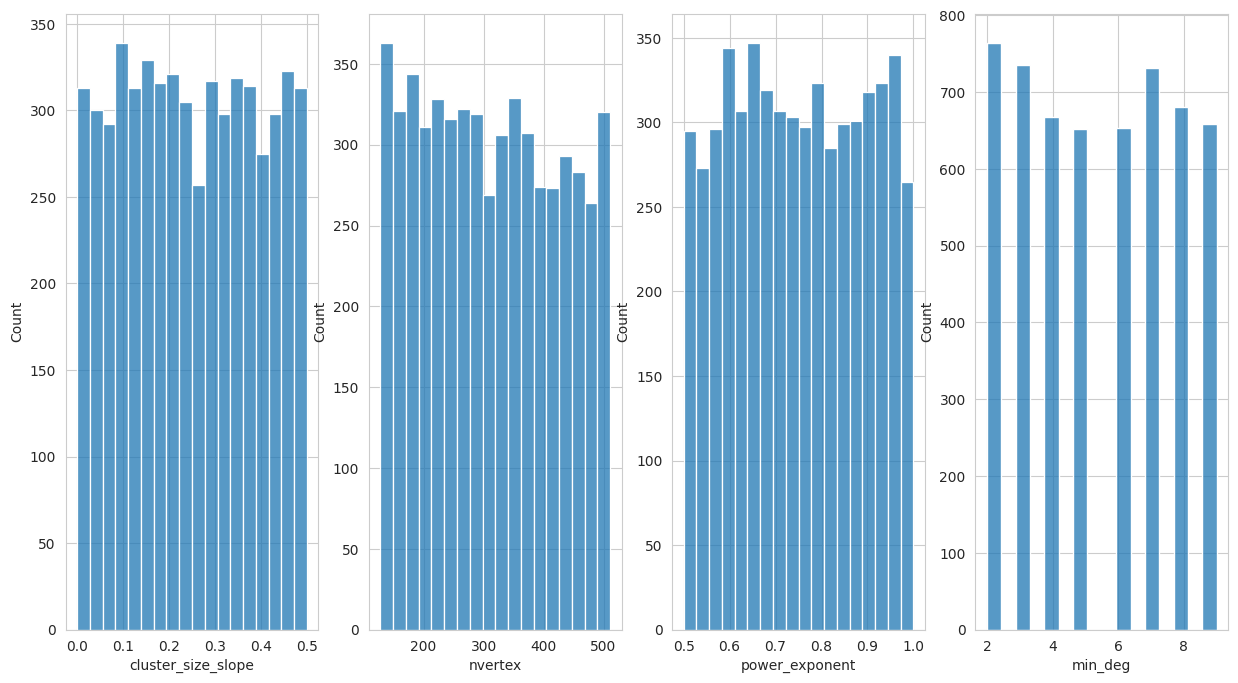

In [113]:
_, axs = plt.subplots(nrows=1, ncols=4, figsize=(15, 8))
sns.histplot(query, x='cluster_size_slope', ax=axs[0])
sns.histplot(query, x='nvertex', ax=axs[1])
sns.histplot(query, x='power_exponent', ax=axs[2])
sns.histplot(query, x='min_deg', ax=axs[3])

plt.show()

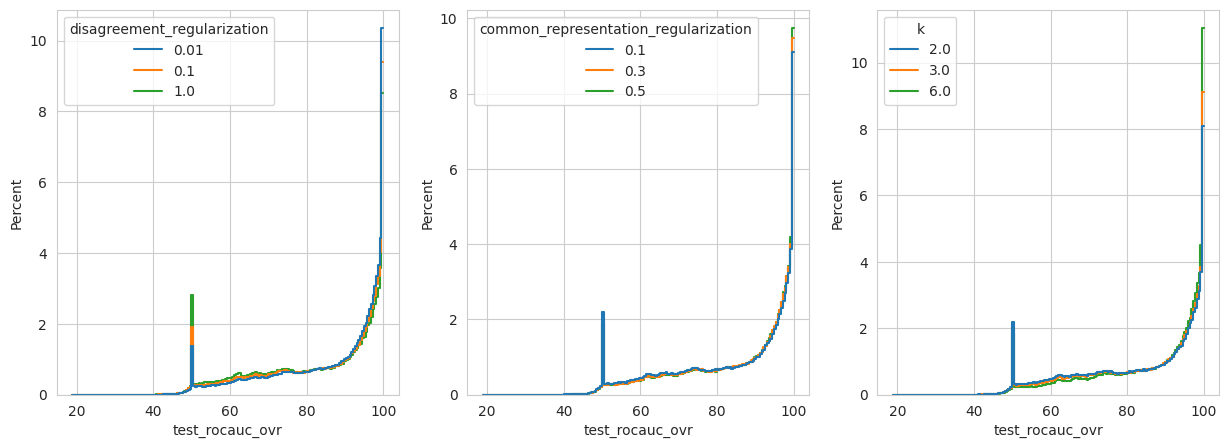

In [75]:
df_mvmi = df_ssl[df_ssl.SSL_model == 'MVMI_FT']
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
df_mvmi['disagreement_regularization'] = df_mvmi['disagreement_regularization'].astype('category')
df_mvmi['common_representation_regularization'] = df_mvmi['common_representation_regularization'].astype('category')
df_mvmi['k'] = df_mvmi['k'].astype('category')
sns.histplot(data=df_mvmi, hue='disagreement_regularization', common_norm=False, fill=False, element='step', stat='percent', x=TEST_METRIC, ax=ax[0])
sns.histplot(data=df_mvmi, hue='common_representation_regularization', common_norm=False, fill=False, element='step', stat='percent', x=TEST_METRIC, ax=ax[1])
sns.histplot(data=df_mvmi, hue='k', common_norm=False, fill=False, element='step', stat='percent', x=TEST_METRIC, ax=ax[2])
plt.show()

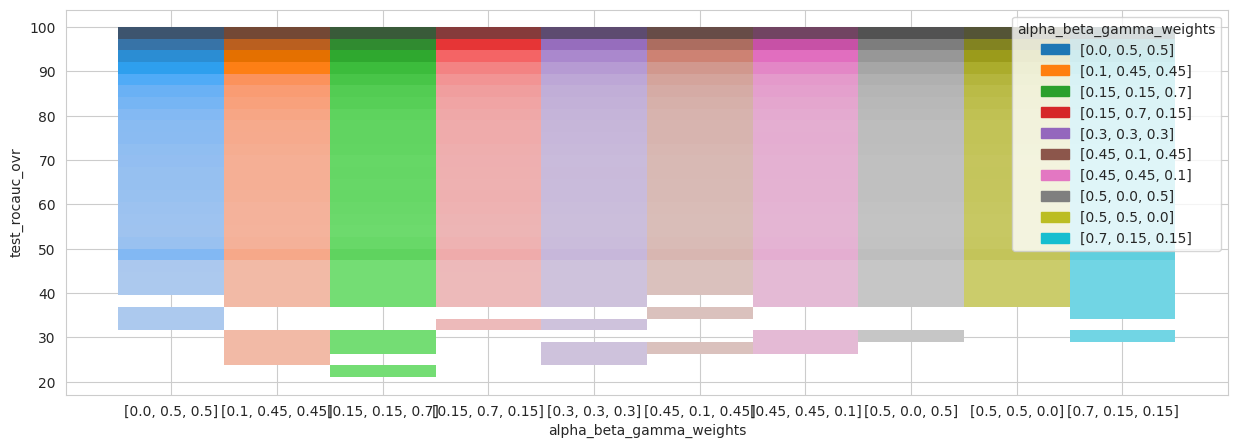

<Figure size 640x480 with 0 Axes>

In [76]:
df_gzoom = df_ssl[df_ssl.SSL_model == 'G_Zoom']
df_gzoom['alpha_beta_gamma_weights'] = df_gzoom['alpha_beta_gamma_weights'].astype(str).astype('category')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
sns.histplot(data=df_gzoom, x='alpha_beta_gamma_weights',bins=30, common_norm=False, hue='alpha_beta_gamma_weights',
              fill=False, element='step', stat='percent', y=TEST_METRIC, ax=ax)
plt.show()
plt.tight_layout()

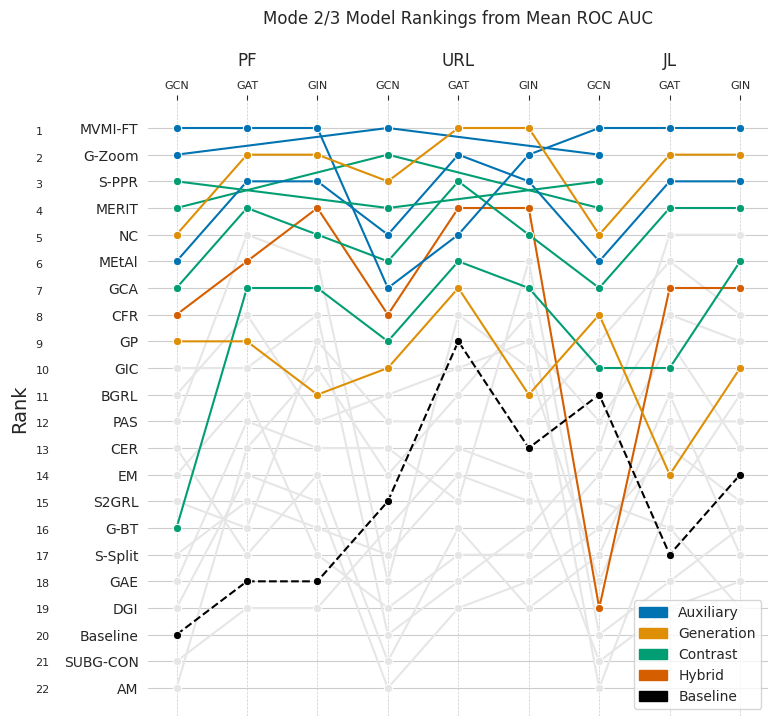

In [81]:
import matplotlib.patches as mpatches
# Plotting
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
palette = {}

for m in model_abbreviations.values():
    if m not in interesting_methods:
        palette[m] = (0.9,0.9,0.9) # grey

palette.update(interesting_methods_color)
# for c, m in zip(sns.color_palette("hls", len(interesting_methods)), interesting_methods):
    # palette[m] = c

sns.lineplot(data=df_ranked[df_ranked['Model'].apply(lambda x: x not in interesting_methods)], x='x_axis', y="rank", hue="Model", legend=False, marker='o',
             palette=palette, clip_on=True, zorder=1)   

# Plot interesting_methods with a higher zorder
sns.lineplot(data=df_ranked[df_ranked['Model'].apply(lambda x: x in interesting_methods)], x='x_axis', y="rank", hue="Model", legend=False, marker='o',
             palette=palette, clip_on=True, zorder=2)

ax.lines[-1].set_linestyle('--')


ax.set_yticks([i for i in range(df_ranked['rank'].min(), df_ranked['rank'].max() + 1)])
ax.set_yticklabels(y_tick_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_tick_labels, fontsize=8)
ax.set_xlabel('')
ax.set_ylabel('Rank', labelpad=25, fontsize=14)
ax.invert_yaxis()
ax.xaxis.grid(True, linestyle='--', linewidth=0.5)  # Add horizontal gridlines
# ax.yaxis.grid(True, linestyle='--', linewidth=0.1)  # Add vertical gridlines
ax.xaxis.tick_top()


# Place titles
ax.annotate(TRAINING_SCHEMES[0], xy=(1, 1.05), xycoords=('data', 'axes fraction'), ha='center', va='bottom', fontsize=12)
ax.annotate(TRAINING_SCHEMES[1], xy=(4, 1.05), xycoords=('data', 'axes fraction'), ha='center', va='bottom', fontsize=12)
ax.annotate(TRAINING_SCHEMES[2], xy=(7, 1.05), xycoords=('data', 'axes fraction'), ha='center', va='bottom', fontsize=12)

# Place rank labels
for idx, label in enumerate(y_tick_rank_labels):
    ax.annotate(label, xy=(-2, 0.94 - idx * 0.0431), xycoords=('data', 'axes fraction'), ha='left', va='bottom', fontsize=8)
ax.set_title('Mode 2/3 Model Rankings from Mean ROC AUC', pad=55)

ax.legend(handles=handles, loc='lower right')
sns.despine(left=True, bottom=True)

In [86]:
df_ssl.SSL_model.unique()

array(['AttributeMask', 'CorruptedEmbeddingsReconstruction',
       'CorruptedFeaturesReconstruction', 'EdgeMask', 'GAE',
       'NodeClusteringWithAlignment', 'S2GRL', 'PairwiseAttrSim',
       'GraphPartitioning', 'BGRL', 'GBT', 'GCA', 'SelfGNNPPR',
       'SelfGNNSplit', 'MERIT', 'DeepGraphInfomax', 'GraphInfoClust',
       'SUBGCON', 'G_Zoom', 'MEtAl', 'MVMI_FT'], dtype=object)

In [85]:
df_ssl[
    (df_ssl.Experiment == 'Mode 2/3') &
    (df_ssl.Encoder == 'GIN') &
    (df_ssl.Training_scheme == 'URL') &
    (df_ssl.SSL_model)
]

Index(['test_rocauc_ovr', 'train_downstream_lr', 'train_pretext_weight',
       'train_pretext_epochs', 'train_pretext_lr', 'encoder_in_channels',
       'encoder_hidden_channels', 'encoder_num_layers', 'encoder_dropout',
       'encoder_heads', 'node_mask_ratio', 'SSL_model', 'SSL_category',
       'Encoder', 'Training_scheme', 'Graph_ID', 'Experiment',
       'embedding_mask_ratio', 'partial_reconstruction', 'feature_mask_ratio',
       'edge_mask_ratio', 'cluster_ratio', 'shortest_path_classes',
       'sample_size', 'k_largest', 'n_partitions', 'edge_mask_ratio1',
       'edge_mask_ratio2', 'feature_mask_ratio1', 'feature_mask_ratio2', 'tau',
       'alpha', 'edge_modification_ratio', 'beta', 'temperature', 'k',
       'B_perc', 'P_perc', 'alpha_beta_gamma_weights', 'ae_loss_weight',
       'fr_loss_weight', 'er_loss_weight', 'disagreement_regularization',
       'common_representation_regularization'],
      dtype='object')

In [82]:

# Get the legend handles and labels
handles, labels = ax.get_legend_handles_labels()

# Filter the handles and labels based on interesting_methods
filtered_handles = []
filtered_labels = []
for handle, label in zip(handles, labels):
    if label in interesting_methods or label == 'Model':
        filtered_handles.append(handle)
        filtered_labels.append(label)

# Adjust the legend properties, such as location and title, and use the filtered handles and labels
ax.legend(handles=filtered_handles, labels=filtered_labels, title='Model', loc='upper left', bbox_to_anchor=(-0.15, 1.15))
ax.xaxis.grid(True, linestyle='--', linewidth=0.5)  # Add horizontal gridlines

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [83]:
for scheme in TRAINING_SCHEMES:
    for encoder in ENCODERS:
        df_temp = pd.concat([df_ssl_means[(df_ssl_means.Training_scheme == scheme) & (df_ssl_means.Encoder == encoder)]])
        print(df_temp)
    df_ssl[df_ssl.Experiment == 'Mode 2/3'].groupby(['SSL_model', 'Encoder', 'Training_scheme'])[TEST_METRIC].mean().reset_index()

    df_temp = best_method_performance.copy()
    df_temp[param] = pd.cut(df_temp[param], bins=20, duplicates='drop').apply(lambda x: x.mid)
    df_grouped = df_temp.groupby([param, 'SSL model']).mean().reset_index()


    df_grouped['rank'] = df_grouped.groupby(param)['ROC AUC'].rank(method='dense', ascending=False)

    fig, ax = plt.subplots(figsize=(5,8))

    palette = {}
    for m in model_abbreviations.values():
        if m not in interesting_methods:
            palette[m] = (0.9,0.9,0.9) # grey

    for c, m in zip(sns.color_palette("hls", len(interesting_methods)), interesting_methods):
        palette[m] = c

    sns.lineplot(data = df_grouped, x=param, y="rank", hue="SSL model", errorbar=None, legend=False, marker='o',
                    palette=palette, clip_on=True, ax=ax)
    #sns.move_legend(ax, "upper left", bbox_to_anchor=(1.05, 1.02))
    ax.set_yticks([])
    ax.set_ylabel("")

    min_param = df_grouped[param].min(); max_param = df_grouped[param].max()
    ax.set_xlim(min_param,max_param)
    ax.invert_yaxis()
    ranks_lowest_param = df_grouped[df_grouped[param] == min_param].sort_values(by="rank", ascending=True, ignore_index=True)
    ranks_highest_param = df_grouped[df_grouped[param] == max_param].sort_values(by="rank", ascending=True, ignore_index=True)

    for index, row in ranks_lowest_param.iterrows():
        ax.text(min_param-(max_param-min_param)/100, index+1, row['SSL model'], horizontalalignment='right', verticalalignment='center')

    for index, row in ranks_highest_param.iterrows():
        ax.text(max_param+(max_param-min_param)/100, index+1, row['SSL model'], horizontalalignment='left', verticalalignment='center')
    plt.title(f"Ranked methods per {param}")
    plt.show()

        Model Encoder Training_scheme  test_rocauc_ovr
4          AM     GCN              PF        89.947747
13       BGRL     GCN              PF        90.886201
22        CER     GCN              PF        90.710095
31        CFR     GCN              PF        91.229900
40        DGI     GCN              PF        90.439193
49         EM     GCN              PF        90.709056
58        GAE     GCN              PF        90.475888
67       G-BT     GCN              PF        90.683446
76        GCA     GCN              PF        91.556463
82     G-Zoom     GCN              PF        95.111140
88        GIC     GCN              PF        90.939147
97         GP     GCN              PF        91.099353
103     MERIT     GCN              PF        93.956613
109     MEtAl     GCN              PF        91.904410
118   MVMI-FT     GCN              PF        95.787965
127        NC     GCN              PF        93.037326
136       PAS     GCN              PF        90.784623
145     S2

NameError: name 'best_method_performance' is not defined

In [ ]:
df_ssl[df_ssl.Experiment == 'Mode 2/3'].groupby(['SSL_model', 'Encoder', 'Training_scheme'])[TEST_METRIC].mean().reset_index()

,SSL_model,Encoder,Training_scheme,test_rocauc_ovr
0,AttributeMask,GAT,JL,90.425304
1,AttributeMask,GAT,PF,91.176010
2,AttributeMask,GAT,URL,89.397132
3,AttributeMask,GCN,JL,89.211311
4,AttributeMask,GCN,PF,89.947747
...,...,...,...,...
166,SelfGNNSplit,GCN,PF,90.655707
167,SelfGNNSplit,GCN,URL,89.543398
168,SelfGNNSplit,GIN,JL,84.832410
169,SelfGNNSplit,GIN,PF,85.960549


In [ ]:
df_ssl = unpivot_ssl_model(df=data, suffix=TEST_METRIC, ssl_models=SSL_MODELS, encoders=ENCODERS, training_schemes=TRAINING_SCHEMES)

In [ ]:
df_ssl.columns

Index(['test_rocauc_ovr', 'train_downstream_lr', 'train_pretext_weight',
       'train_pretext_epochs', 'train_pretext_lr', 'encoder_in_channels',
       'encoder_hidden_channels', 'encoder_num_layers', 'encoder_dropout',
       'encoder_heads', 'node_mask_ratio', 'SSL_model', 'SSL_category',
       'Encoder', 'Training_scheme', 'Graph_ID', 'Experiment',
       'embedding_mask_ratio', 'partial_reconstruction', 'feature_mask_ratio',
       'edge_mask_ratio', 'cluster_ratio', 'shortest_path_classes',
       'sample_size', 'k_largest', 'n_partitions', 'edge_mask_ratio1',
       'edge_mask_ratio2', 'feature_mask_ratio1', 'feature_mask_ratio2', 'tau',
       'alpha', 'edge_modification_ratio', 'beta', 'temperature', 'k',
       'B_perc', 'P_perc', 'alpha_beta_gamma_weights', 'ae_loss_weight',
       'fr_loss_weight', 'er_loss_weight', 'disagreement_regularization',
       'common_representation_regularization'],
      dtype='object')

In [ ]:
import pandas as pd


grouped_means = df_ssl[df_ssl.Experiment == 'Mode 2/3'].groupby(['Encoder', 'Training_scheme', 'SSL_model'])[TEST_METRIC].mean().reset_index()
grouped_means['SSL_category'] = grouped_means['SSL_model'].apply(ssl_method_to_category)

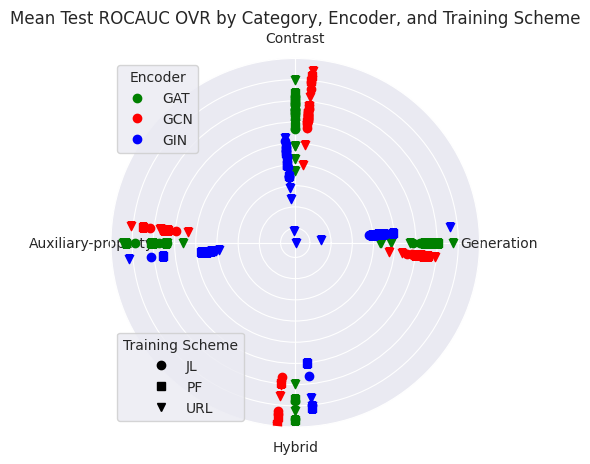

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define unique categories, encoders, and training schemes
unique_categories = grouped_means['SSL_category'].unique()
unique_encoders = grouped_means['Encoder'].unique()
unique_training_schemes = grouped_means['Training_scheme'].unique()

# Assign markers to training schemes
training_scheme_markers = {scheme: marker for scheme, marker in zip(unique_training_schemes, ['o', 's', 'v'])}

# Set up the polar plot
fig, ax = plt.subplots(subplot_kw={'polar': True})
ax.set_ylim(grouped_means[TEST_METRIC].min() - 0.1, grouped_means[TEST_METRIC].max() + 0.1)
theta_offset = 2 * np.pi / len(unique_categories)
encoder_offsets = { 'GCN': -0.1, 'GAT': 0, 'GIN': 0.1 }

for category_idx, category in enumerate(unique_categories):
    category_data = grouped_means[grouped_means['SSL_category'] == category]
    
    for _, row in category_data.iterrows():
        
        r = row['test_rocauc_ovr']
        encoder = row['Encoder']
        training_scheme = row['Training_scheme']
        
        theta = category_idx * theta_offset + encoder_offsets[encoder]
        ax.scatter(theta, r, c=ENCODER_COLORS[encoder], marker=training_scheme_markers[training_scheme], label=f"{encoder} {training_scheme}")



# Customize polar plot
ax.set_xticks(np.arange(0, 2 * np.pi, theta_offset))
ax.set_xticklabels(unique_categories)
ax.set_yticklabels([])  # Remove radial ticks
ax.set_rlabel_position(-30)  # Move radial labels to avoid overlapping with data points
ax.set_title('Mean Test ROCAUC OVR by Category, Encoder, and Training Scheme')

# Create custom legend for encoders and training schemes
encoder_legend = [plt.Line2D([0], [0], linestyle='none', marker='o', color=ENCODER_COLORS[encoder]) for encoder in unique_encoders]
scheme_legend = [plt.Line2D([0], [0], linestyle='none', marker=training_scheme_markers[scheme], color='black') for scheme in unique_training_schemes]

legend1 = plt.legend(encoder_legend, unique_encoders, title='Encoder', loc='upper left')
legend2 = plt.legend(scheme_legend, unique_training_schemes, title='Training Scheme', loc='lower left')
ax.add_artist(legend1)  # Add the first legend back, since the second one replaces it by default

plt.show()


# Overall model results in each mode

In [ ]:
all_models_cols = [TEST_METRIC, 'Graph_ID', 'Experiment']
all_models_df = pd.concat([
    df_ssl.loc[:, all_models_cols + ['SSL_model']].rename(columns={ 'SSL_model': 'Model' }),
    df_baseline.loc[:, all_models_cols + ['Baseline_model']].rename(columns={ 'Baseline_model': 'Model' })
], ignore_index=True)

mode_1_rankings = (
    all_models_df[all_models_df.Experiment == 'Mode 1']
    .groupby('Model')[TEST_METRIC]
    .mean()
    .rank(ascending=False, method='min')
    .reset_index()
    .rename(columns={ TEST_METRIC: 'Mode 1 rank'})
    .astype({ 'Mode 1 rank': int })
)
mode_2_3_rankings = (
    all_models_df[all_models_df.Experiment == 'Mode 2/3']
    .groupby('Model')[TEST_METRIC]
    .mean()
    .rank(ascending=False, method='min')
    .reset_index()
    .rename(columns={ TEST_METRIC: 'Mode 2/3 rank'})
    .astype({ 'Mode 2/3 rank': int })
)
all_models_df = (
    all_models_df
    .pipe(pd.merge, right=mode_1_rankings, on='Model')
    .pipe(pd.merge, right=mode_2_3_rankings, on='Model')
)

all_models_df = all_models_df.astype({
    'Model': 'category',
    'Experiment': 'category'
})

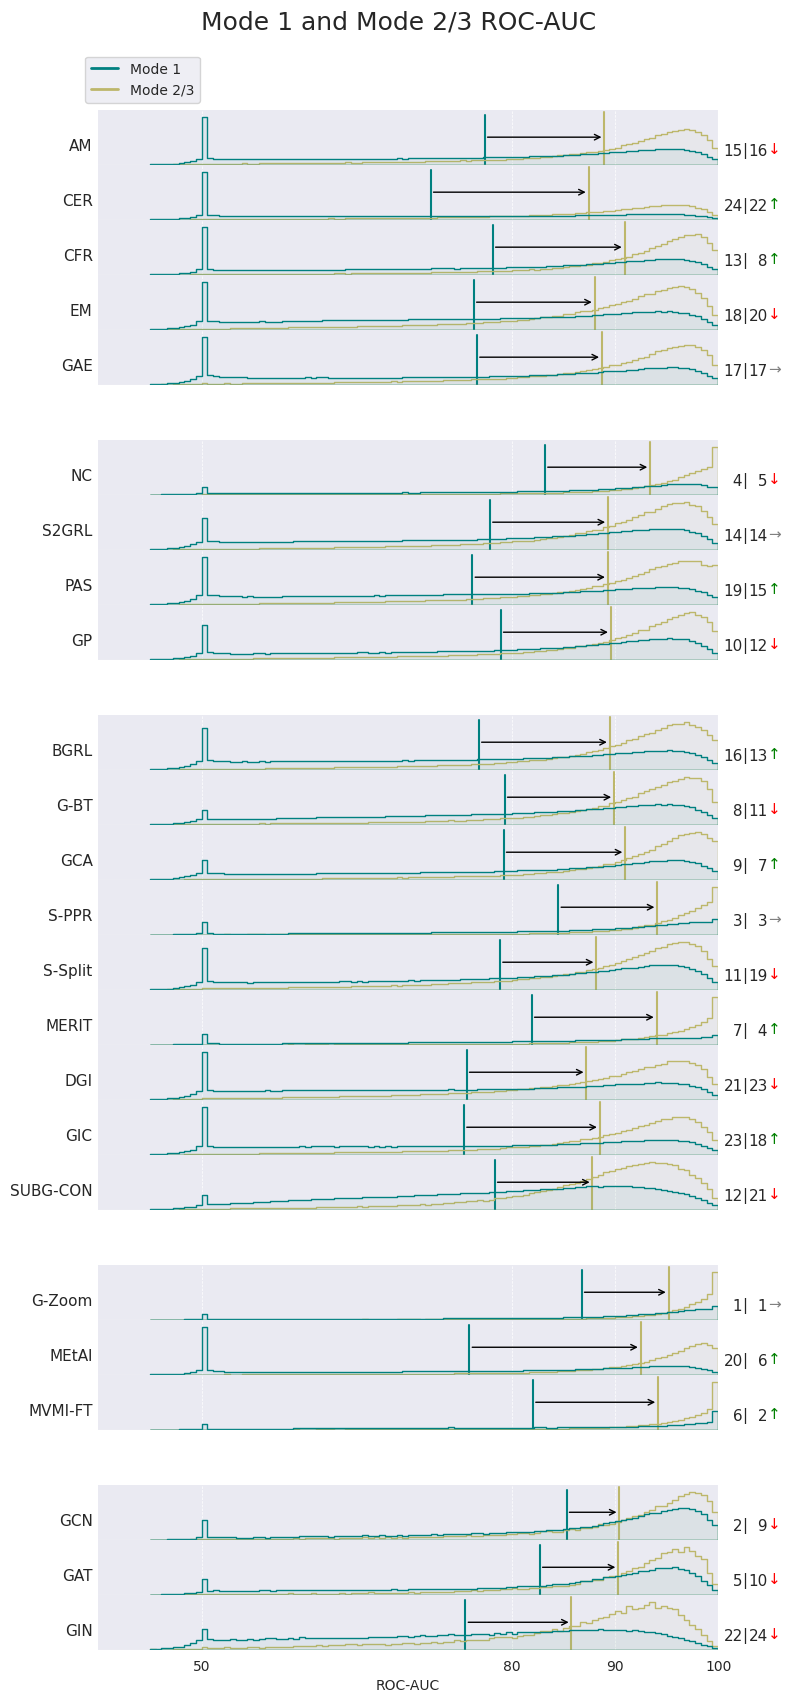

In [ ]:
df = all_models_df
color_palette = { 'Mode 1': 'darkkhaki', 'Mode 2/3': 'teal' }

models_with_positions = GENERATION_ALL + AUXILIARY_ALL + CONTRAST_ALL + HYBRID_ALL + BASELINES
bins = np.linspace(45, 100, num=100)
n_rows = len(models_with_positions) + 4

fig = plt.figure(figsize=(8, 20))
outer = gridspec.GridSpec(nrows=n_rows, ncols=1, hspace=0.002)
color_map = { 'Mode 1': 'teal', 'Mode 2/3': 'darkkhaki' }

legend_elements = [
    Line2D([0], [0], color=color_map['Mode 1'], lw=2, label='Mode 1'),
    Line2D([0], [0], color=color_map['Mode 2/3'], lw=2, label='Mode 2/3')
]
fig.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0.1, 0.91))
fig.suptitle('Mode 1 and Mode 2/3 ROC-AUC', fontsize=18, y=0.93)


cur_idx = -1
axes = []
for models_in_category in [GENERATION_ALL, AUXILIARY_ALL, CONTRAST_ALL, HYBRID_ALL, BASELINES]:
    cur_idx += 1
    for model_idx, model in enumerate(models_in_category):
        ax = plt.Subplot(fig, outer[cur_idx])
        axes += [ax]
        model_data = df[df['Model'] == model]
        sns.histplot(model_data, x=TEST_METRIC, hue='Experiment', 
                     stat='percent', common_norm=False, 
                     element='step', fill=True, 
                     alpha=0.05, bins=bins,
                     palette=color_map,
                     ax=ax)
        
        means = model_data.groupby('Experiment')[TEST_METRIC].mean()
        maxs = model_data.groupby('Experiment')[TEST_METRIC].max()

        # Dashed line for the mean
        # ax.plot([means.loc['Mode 1']] * 2, [0, ax.get_ylim()[1]], color=color_map['Mode 1'], linestyle='--', zorder=0)
        # ax.plot([means.loc['Mode 2/3']] * 2, [0, ax.get_ylim()[1]], color=color_map['Mode 2/3'], linestyle='--', zorder=0)

        # Non dashed line for the mean
        ax.plot([means.loc['Mode 1']] * 2, [0, ax.get_ylim()[1]], color=color_map['Mode 1'], zorder=0)
        ax.plot([means.loc['Mode 2/3']] * 2, [0, ax.get_ylim()[1]], color=color_map['Mode 2/3'], zorder=0)

        ax.annotate("", xy=(means.loc['Mode 2/3'], ax.get_ylim()[1] / 2), 
            xytext=(means.loc['Mode 1'], ax.get_ylim()[1] / 2),
            arrowprops=dict(facecolor='purple', edgecolor='black', arrowstyle='->'))


        # Bar for the mean
        # ax.bar(means.loc['Mode 1'], ax.get_ylim()[1], color=color_map['Mode 1'], width=0.005, align='center', zorder=0, alpha=0.6)
        # ax.bar(means.loc['Mode 2/3'], ax.get_ylim()[1], color=color_map['Mode 2/3'], width=0.005, align='center', zorder=0, alpha=0.6)

        # Triangle and circle
        # ax.plot(means.loc['Mode 1'], ax.get_ylim()[1] / 2, marker='o', markersize=8, color=color_map['Mode 1'], linestyle='', zorder=3)
        # ax.plot(means.loc['Mode 2/3'], ax.get_ylim()[1] / 2, marker='^', markersize=8, color=color_map['Mode 2/3'], linestyle='', zorder=3)

        # Annotation for the mean
        # ax.annotate(f"Mode 1 Mean: {means.loc['Mode 1']:.3f}", xy=(means.loc['Mode 1'], ax.get_ylim()[1] * 0.9), fontsize=8, color=color_map['Mode 1'], ha='center', va='center')
        # ax.annotate(f"Mode 2/3 Mean: {means.loc['Mode 2/3']:.3f}", xy=(means.loc['Mode 2/3'], ax.get_ylim()[1] * 0.8), fontsize=8, color=color_map['Mode 2/3'], ha='center', va='center')

        # Shaded region
        # ax.axvspan(means.loc['Mode 1'] - 0.01, means.loc['Mode 1'] + 0.01, color=color_map['Mode 1'], alpha=0.3, zorder=1)
        # ax.axvspan(means.loc['Mode 2/3'] - 0.01, means.loc['Mode 2/3'] + 0.01, color=color_map['Mode 2/3'], alpha=0.3, zorder=1)



        ylabel = ax.set_ylabel(model)
        ylabel = ax.set_ylabel(model_abbreviations[model], rotation=0, size=11, ha='right')
        ylabel.set_position((-.1, .2))


    
        # Add rank        
        mode1_rank = model_data.iloc[0]['Mode 1 rank']
        mode23_rank = model_data.iloc[0]['Mode 2/3 rank']        
        mode1_rank_x, rank_y = 1.04, .25
        rank_props = { 'xycoords': 'axes fraction', 'fontsize': 11, 'ha': 'right', 'va': 'center'}

        ax.annotate(f"{mode1_rank:2}", xy=(mode1_rank_x, rank_y), **rank_props)
        ax.annotate('|', xy=(mode1_rank_x + .007, rank_y), **rank_props)
        ax.annotate(f"{mode23_rank:2}", xy=(mode1_rank_x + .04, rank_y), **rank_props)


        if mode1_rank > mode23_rank:
            arrow_direction = u'\u2191'
            arrow_color = 'green'
        elif mode23_rank > mode1_rank :
            arrow_direction = u'\u2193'
            arrow_color = 'red'
        else:
            arrow_direction = u'\u2192'
            arrow_color = 'gray'

        ax.annotate(arrow_direction, xy=(1.04, .2), xycoords="axes fraction", xytext=(1.08, 0.20),
                    textcoords="axes fraction", fontsize=11, color=arrow_color)


        ax.get_legend().remove()
        ax.yaxis.set_ticks([])
        ax.yaxis.set_ticklabels([])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(True)
        ax.spines['left'].set_visible(False)
        ax.xaxis.grid(True, linestyle='--', linewidth=0.5)
        ax.set_xlim([40, 100])
        axes[-1].set_xticks([50, 80, 90, 100])
        cur_idx += 1

        if cur_idx < n_rows:
            ax.set_xlabel('')
            ax.set_xticklabels([])

        fig.add_subplot(ax)

axes[-1].set_xlabel('ROC-AUC')
axes[0].annotate('', xy=(0, -0.1), xycoords='axes fraction', xytext=(1, -0.1), 
            arrowprops=dict(arrowstyle="<->", color='b'))
fig.canvas.draw()

# Pretext Weight

In [ ]:
df_ssl_mode1 = df_ssl[df_ssl.Experiment == 'Mode 1']
df_ssl_jl = df_ssl_mode1[df_ssl_mode1.Training_scheme == 'JL']

# Mode 1 and Mode 2/3 results

In [21]:
dff = df_ssl[df_ssl.Experiment == 'Mode 2/3'].groupby(['SSL_model', 'Encoder', 'Training_scheme'])[TEST_METRIC].agg(['mean', 'std']).reset_index()

In [22]:
baseline_means = df_baseline[df_baseline.Experiment == 'Mode 2/3'].groupby(['Baseline_model'])[TEST_METRIC].agg(['mean']).reset_index()

In [23]:
ssl_cat_mean = df_ssl[df_ssl.Experiment == 'Mode 2/3'].groupby('SSL_category')[TEST_METRIC].mean().reset_index()

In [24]:
def print_latex_row(df_ssl_category_means, df_ssl_category_stds, method_results):
    method_mean, method_std = method_results['mean'], method_results['std']
    for training_Scheme in ['PF', 'URL', 'JL']:
        for encoder in ['GCN', 'GAT', 'GIN']:
            if encoder not in df_ssl_category_means.Encoder.values:
                continue
            query = (df_ssl_category_means.Training_scheme == training_Scheme) & (df_ssl_category_means.Encoder == encoder)
            mean = df_ssl_category_means.loc[query, TEST_METRIC].values[0]
            std = df_ssl_category_stds.loc[query, TEST_METRIC].values[0]
            print(f'${mean:.1f}\pm{std:.1f}$ ', end='&')
    print(f'${method_mean:.1f}\pm{method_std:.1f}$', end='')

def print_latex_table(experiment):
    for ssl_cat in [GENERATION_ALL, AUXILIARY_ALL, CONTRAST_ALL, HYBRID_ALL]:
        for model in ssl_cat:
            print(model)
            df_query = df_ssl.loc[(df_ssl.SSL_model == model) & (df_ssl.Experiment == experiment)]

            grp = df_query.groupby(['Training_scheme', 'Encoder'])[TEST_METRIC]
            means, stds = grp.mean().reset_index(), grp.std().reset_index()
            method_results = df_query[TEST_METRIC].agg(['mean', 'std'])
            print_latex_row(means, stds, method_results)
            print('\n')

In [25]:
dff

,SSL_model,Encoder,Training_scheme,mean,std
0,AttributeMask,GAT,JL,90.425304,8.842210
1,AttributeMask,GAT,PF,91.176010,8.433118
2,AttributeMask,GAT,URL,89.397132,11.161800
3,AttributeMask,GCN,JL,89.211311,10.124417
4,AttributeMask,GCN,PF,89.947747,8.482521
...,...,...,...,...,...
166,SelfGNNSplit,GCN,PF,90.655707,9.460393
167,SelfGNNSplit,GCN,URL,89.543398,10.981384
168,SelfGNNSplit,GIN,JL,84.832410,11.356634
169,SelfGNNSplit,GIN,PF,85.960549,11.158307


Text(0.5, 1.0, 'Mean ROC-AUC for Each Model Grouped by SSL Category')

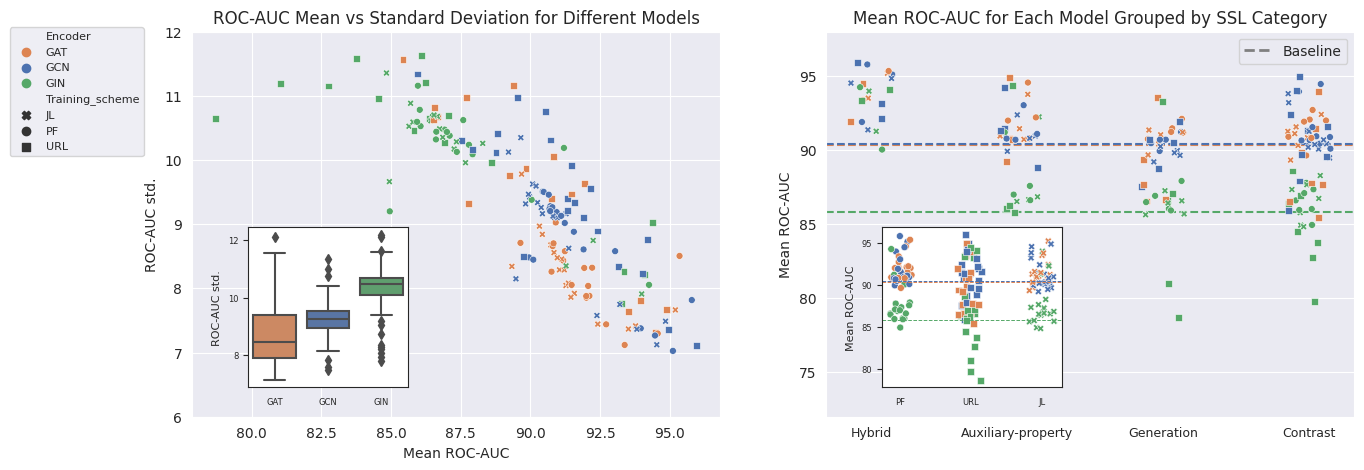

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas.core.common as pc
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

sns.set_style('darkgrid')
warnings.filterwarnings('ignore', category=pc.SettingWithCopyWarning)    

MARKERS = { scheme: marker for (scheme, marker) in zip(TRAINING_SCHEMES, ['o', 's', 'X'])}


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
dff['SSL_category'] = dff['SSL_model'].apply(ssl_method_to_category)
ENCODER_COLORS = {
    'GCN': '#4C72B0',  # Blue
    'GAT': '#DD8452',  # Orange
    'GIN': '#55A868',  # Green
}

def draw_baselines(ax, **kwargs):
    ax.axhline(y=baseline_means.loc[0]['mean'], linestyle='--', color=ENCODER_COLORS[baseline_means.loc[0]['Baseline_model']], alpha=1, zorder=1, **kwargs)
    ax.axhline(y=baseline_means.loc[1]['mean'], linestyle='--', color=ENCODER_COLORS[baseline_means.loc[1]['Baseline_model']], alpha=1, zorder=1, **kwargs)
    ax.axhline(y=baseline_means.loc[2]['mean'], linestyle='--', color=ENCODER_COLORS[baseline_means.loc[2]['Baseline_model']], alpha=1, zorder=1, **kwargs)

draw_baselines(ax[1])

# custom_swarmplot(data=dff, x='SSL_category', y='mean', hue='Encoder', style='Training_scheme', ax=ax[1], palette=ENCODER_COLORS, markers=MARKERS)
sns.scatterplot(data=dff, x='mean', y='std', hue='Encoder', style='Training_scheme', ax=ax[0], palette=ENCODER_COLORS, markers=MARKERS, s=25)

x_ticks = []
x_tick_labels = []
dff.loc[:, 'x_jitter'] = np.random.uniform(-0.15, 0.15, size=dff.shape[0])
for idx, ssl_cat in enumerate([HYBRID_CATEGORY, AUXILIARY_CATEGORY, GENERATION_BASED_CATEGORY, CONTRAST_BASED]):
    df__cat = dff[(dff.SSL_category == ssl_cat)]
    df__cat.loc[:, 'x_jitter'] += idx
    sns.scatterplot(data=df__cat, x='x_jitter', y='mean', ax=ax[1], hue='Encoder', style='Training_scheme', 
                    palette=ENCODER_COLORS, markers=MARKERS, alpha=1, s=25)
    x_ticks += [idx]
    x_tick_labels += [ssl_cat]


ax[1].set_xticks(x_ticks)
ax[1].set_xticklabels(x_tick_labels, fontsize=9)
ax[1].set_xlabel('')

fig.legend(*ax[0].get_legend_handles_labels(), loc='upper left', bbox_to_anchor=(0.0, 0.9), ncol=1, fontsize=8)
ax[0].get_legend().remove()
ax[1].get_legend().remove()

ax[0].set_xlabel('Mean ROC-AUC')
ax[1].set_ylabel('Mean ROC-AUC')
ax[0].set_ylabel('ROC-AUC std.')

ax[1].xaxis.grid(False)
ax[1].set_ylim([72, 98])

custom_lines = [Line2D([0], [0], color='grey', linestyle='--', lw=2, label='Baseline')]

# Combine existing legend handles and labels with the custom entry
handles, labels = ax[1].get_legend_handles_labels()
handles = custom_lines
labels = ['Baseline']

# Add the combined legend to ax[1]
ax[1].legend(handles, labels, loc='upper right', ncol=1)
ax[0].set_ylim([6, 12])
query_exclude_non_fair_models = (
    (~dff.SSL_model.isin(['G_Zoom', 'MERIT', 'SelfGNNPPR']))
)

with sns.axes_style('white'):
    x_ticks_inner, x_tick_labels_inner = [], []
    inner_ax = inset_axes(ax[1], width=1.8, height=1.6, loc=3, borderpad=1, bbox_to_anchor=(0.08, 0.04, 1, 1), bbox_transform=ax[1].transAxes)
    inner_ax.set_xlabel('')
    for idx, training_scheme in enumerate(TRAINING_SCHEMES):
        x_ticks_inner += [idx]
        x_tick_labels_inner += [training_scheme]
        dff_ = dff[dff.Training_scheme == training_scheme]
        dff_.loc[:, 'x_jitter'] += idx + np.random.uniform(-0.05, 0.05, size=dff_.shape[0])
        sns.scatterplot(data=dff_, x='x_jitter', y='mean', ax=inner_ax, hue='Encoder', style='Training_scheme', 
                palette=ENCODER_COLORS, markers=MARKERS, alpha=1, s=25)
    draw_baselines(inner_ax, linewidth=0.7)
    inner_ax.get_legend().remove()
    inner_ax.set_yticks([80, 85, 90, 95], fontsize=8)
    inner_ax.tick_params(labelright=False, labelleft=True, which='both', left=True, right=False, bottom=False, labelsize=6)
    inner_ax.set_xticks(x_ticks_inner)
    inner_ax.set_xticklabels(x_tick_labels_inner, fontsize=6)
    inner_ax.set_xlabel('')
    inner_ax.xaxis.grid(False)
    inner_ax.set_ylabel('Mean ROC-AUC', fontsize=8, rotation=90)
    


with sns.axes_style('white'):
    x_ticks_inner, x_tick_labels_inner = [], []
    inner_ax = inset_axes(ax[0], width=1.6, height=1.6, loc=3, borderpad=1, bbox_to_anchor=(0.08, 0.04, 1, 1), bbox_transform=ax[0].transAxes)
    sns.boxplot(data=dff[query_exclude_non_fair_models], x='Encoder', y='std', ax=inner_ax, palette=ENCODER_COLORS)
    inner_ax.set_ylabel('')
    inner_ax.set_yticks([8, 10, 12], fontsize=8)
    inner_ax.tick_params(labelright=False, labelleft=True, which='both', left=True, right=False, labelsize=6)
    inner_ax.set_xlabel('')
    inner_ax.xaxis.grid(False)
    inner_ax.set_ylabel('ROC-AUC std.', fontsize=8, rotation=90)
ax[0].set_title('ROC-AUC Mean vs Standard Deviation for Different Models')
ax[1].set_title('Mean ROC-AUC for Each Model Grouped by SSL Category')

In [27]:
df_ssl[df_ssl.Experiment == 'Mode 2/3'].groupby('SSL_category')[TEST_METRIC].agg(['mean', 'std'])

,mean,std
SSL_category,,
Auxiliary-property,90.415040,9.741518
Contrast,89.339380,9.961353
Generation,88.830303,10.244675
Hybrid,93.603215,8.264149


In [28]:
df_ssl[df_ssl.Experiment == 'Mode 2/3'].groupby('Training_scheme')[TEST_METRIC].agg(['mean', 'std'])

,mean,std
Training_scheme,,
JL,90.075567,9.493711
PF,90.459128,9.466769
URL,89.331792,10.684601


### Mode 1

In [29]:
print_latex_table('Mode 1')

AttributeMask
$84.7\pm13.7$ &$82.3\pm14.4$ &$75.6\pm14.1$ &$78.1\pm14.9$ &$79.2\pm14.3$ &$70.8\pm13.9$ &$78.2\pm17.8$ &$77.1\pm17.3$ &$70.7\pm16.7$ &$77.4\pm15.9$

CorruptedEmbeddingsReconstruction
$84.2\pm13.9$ &$82.0\pm14.5$ &$75.0\pm14.0$ &$69.3\pm15.0$ &$72.0\pm15.3$ &$61.0\pm10.4$ &$71.3\pm18.2$ &$70.4\pm18.0$ &$64.5\pm14.8$ &$72.2\pm16.6$

CorruptedFeaturesReconstruction
$85.0\pm13.6$ &$82.6\pm14.4$ &$75.7\pm14.2$ &$80.0\pm14.1$ &$80.7\pm13.7$ &$73.7\pm14.7$ &$78.5\pm17.7$ &$77.0\pm17.6$ &$70.5\pm16.5$ &$78.2\pm15.8$

EdgeMask
$84.7\pm13.6$ &$82.2\pm14.4$ &$75.3\pm14.0$ &$77.4\pm13.6$ &$78.5\pm13.4$ &$66.7\pm11.5$ &$77.6\pm16.7$ &$76.1\pm16.7$ &$68.7\pm14.6$ &$76.4\pm15.3$

GAE
$84.9\pm13.7$ &$82.2\pm14.6$ &$75.9\pm14.2$ &$78.8\pm14.9$ &$79.2\pm14.4$ &$69.6\pm14.0$ &$76.1\pm17.7$ &$74.3\pm17.6$ &$68.9\pm16.0$ &$76.7\pm16.1$

NodeClusteringWithAlignment
$85.9\pm13.4$ &$83.5\pm14.3$ &$77.2\pm14.8$ &$84.4\pm13.0$ &$84.8\pm12.7$ &$79.1\pm15.0$ &$86.8\pm13.6$ &$84.9\pm15.1$ &$82.6\pm1

In [30]:
print_latex_table('Mode 2/3')

AttributeMask
$89.9\pm8.5$ &$91.2\pm8.4$ &$86.9\pm10.5$ &$90.5\pm10.8$ &$89.4\pm11.2$ &$86.6\pm12.1$ &$89.2\pm10.1$ &$90.4\pm8.8$ &$86.6\pm10.7$ &$89.0\pm10.3$

CorruptedEmbeddingsReconstruction
$90.7\pm9.3$ &$90.8\pm8.3$ &$86.1\pm10.5$ &$87.5\pm10.3$ &$86.7\pm10.7$ &$78.7\pm10.6$ &$90.0\pm9.4$ &$91.0\pm8.3$ &$85.6\pm10.5$ &$87.5\pm10.5$

CorruptedFeaturesReconstruction
$91.2\pm9.0$ &$92.1\pm7.9$ &$87.9\pm10.1$ &$91.9\pm9.1$ &$93.5\pm7.6$ &$93.3\pm7.8$ &$89.8\pm9.3$ &$91.4\pm8.1$ &$87.3\pm10.2$ &$90.9\pm9.1$

EdgeMask
$90.7\pm9.3$ &$91.5\pm8.1$ &$85.9\pm10.6$ &$88.8\pm10.1$ &$86.6\pm10.8$ &$81.0\pm11.2$ &$90.3\pm9.3$ &$91.2\pm8.3$ &$86.4\pm10.6$ &$88.0\pm10.4$

GAE
$90.5\pm9.5$ &$91.2\pm8.6$ &$86.5\pm10.7$ &$90.7\pm10.3$ &$87.7\pm12.1$ &$87.1\pm10.7$ &$89.7\pm10.3$ &$89.7\pm9.8$ &$85.7\pm10.9$ &$88.7\pm10.5$

NodeClusteringWithAlignment
$93.0\pm8.6$ &$94.6\pm7.3$ &$91.2\pm10.2$ &$94.2\pm8.8$ &$94.9\pm7.7$ &$94.4\pm9.0$ &$92.4\pm7.6$ &$93.8\pm7.4$ &$92.2\pm8.7$ &$93.4\pm8.5$

S2GRL
$90.

In [31]:
df_baseline[df_baseline.Experiment == 'Mode 2/3'].groupby('Baseline_model')[TEST_METRIC].agg(['mean', 'std']).reset_index().round({ 'mean': 1, 'std': 1})

,Baseline_model,mean,std
0,GAT,90.3,9.0
1,GCN,90.4,9.5
2,GIN,85.8,10.8


# Encoder results

In [43]:
query = (
    (df_ssl.Experiment == 'Mode 2/3') &
    (~ df_ssl.SSL_model.isin(['G_Zoom', 'MERIT', 'SelfGNNPPR']))
)
grp = df_ssl[query].groupby(['Training_scheme', 'Encoder'])
encoder_mean = grp[TEST_METRIC].agg(['mean', 'std']).round({ 'mean': 1, 'std': 1})

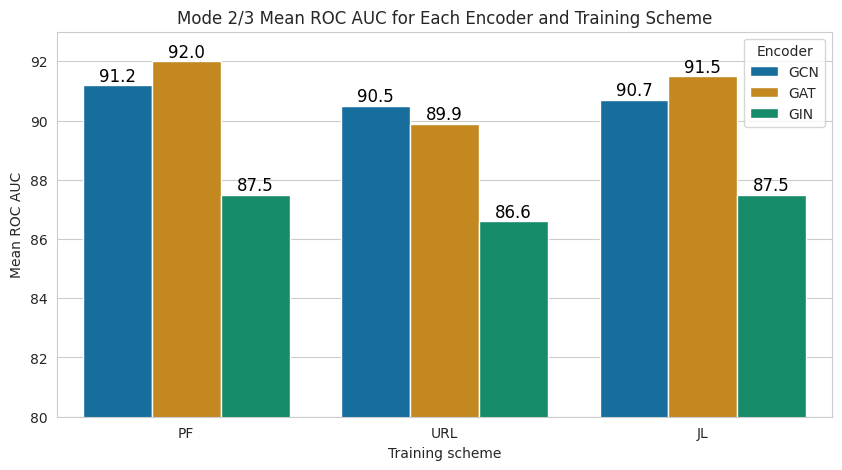

In [61]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.barplot(data=encoder_mean.reset_index(), x='Training_scheme', y='mean', hue='Encoder', palette=ENCODER_COLORS, ax=ax,
            order=['PF', 'URL', 'JL'], hue_order=['GCN', 'GAT', 'GIN']).set(
    xlabel='Training scheme', ylabel='Mean ROC AUC', title='Mode 2/3 Mean ROC AUC for Each Encoder and Training Scheme'
)
plt.ylim(80, 93)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '{0:.1f}'.format(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

In [33]:
(
df_ssl[query]
    .groupby(['SSL_model', 'Training_scheme', 'Encoder'])[TEST_METRIC]
    .agg(['std'])
    .reset_index()
    .groupby('Encoder')['std']
    .quantile([.25, .75])
)

Encoder      
GAT      0.25     7.881257
         0.75     9.381035
GCN      0.25     8.925457
         0.75     9.548551
GIN      0.25    10.099124
         0.75    10.691584
Name: std, dtype: float64

In [34]:
# Assuming you have the DataFrame df_ssl and the query variable set
# Create a pivot table with rows as (SSL_model, Training_scheme) and columns as Encoder with mean values

SSL_model_mean_perf = df_ssl[df_ssl.Experiment == 'Mode 2/3'].groupby('SSL_model')[TEST_METRIC].agg(['mean']).reset_index()
pp = (
    df_ssl[df_ssl.Experiment == 'Mode 2/3']
    .pivot_table(index=['SSL_model', 'Training_scheme'],
                 columns='Encoder',
                 values=TEST_METRIC,
                 aggfunc='mean')
    .reset_index()
    .merge(right=SSL_model_mean_perf, on='SSL_model')
)

pp['GAT - GCN'] = pp.GAT - pp.GCN
pp['GAT - GIN'] = pp.GAT - pp.GIN
pp['GCN - GIN'] = pp.GCN - pp.GIN

pp['GAT'] = (pp.GAT - pp['mean'])
pp['GCN'] = (pp.GCN - pp['mean'])
pp['GIN'] = (pp.GIN - pp['mean'])
pp['SSL_model'] = pp['SSL_model'].apply(lambda model: model_abbreviations[model])
pp_melted = pp.melt(id_vars=['SSL_model', 'Training_scheme'], value_vars=['GAT', 'GCN', 'GIN'], var_name='Encoder', value_name='Diff').dropna()

/tmp/ipykernel_48737/4255274771.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


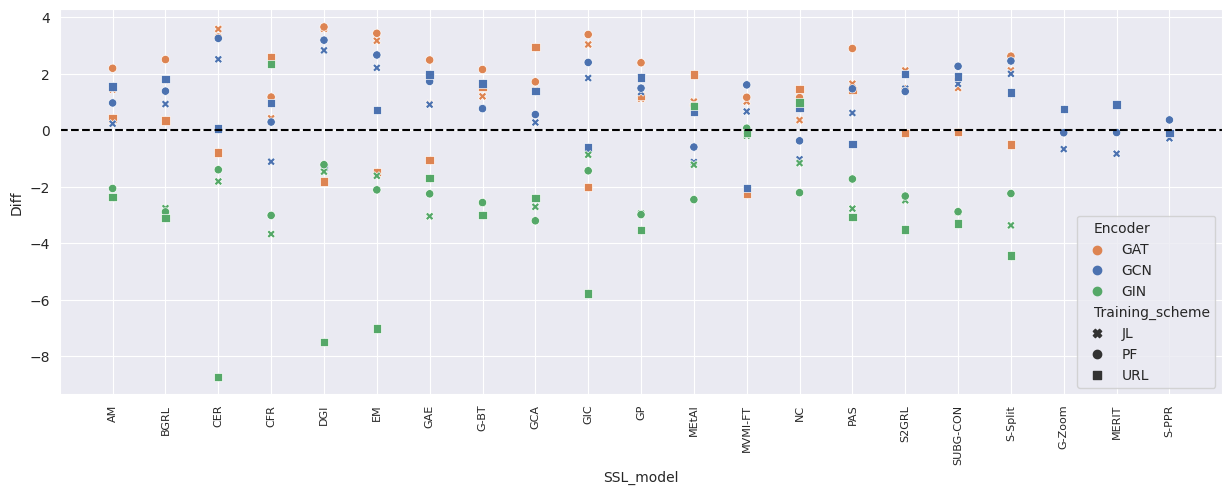

In [35]:
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
max_abs_diff = pp_melted['Diff'].abs().max()

sns.scatterplot(data=pp_melted, x='SSL_model', y='Diff', hue='Encoder', style='Training_scheme', markers=MARKERS, palette=ENCODER_COLORS)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(axis='x', labelsize=8)
ax.axhline(y=0, linestyle='--', color='black', alpha=1, zorder=1)
# ax.set_ylim([-max_abs_diff +, max_abs_diff])

In [36]:
dff_filter = (df_ssl.Experiment == 'Mode 2/3')
dff = df_ssl[dff_filter]
dff_category_means = dff.groupby('SSL_category')[TEST_METRIC].agg(['mean']).reset_index()
dff = dff.groupby(['SSL_model', 'Encoder', 'Training_scheme'])[TEST_METRIC].agg(['mean', 'std']).reset_index()
dff['SSL_category'] = dff['SSL_model'].apply(ssl_method_to_category)
dff['SSL_model'] = df_ssl['SSL_model'].apply(lambda model: model_abbreviations[model])

Text(0.5, 1.0, 'Mean ROC AUC for Each Model Grouped by SSL Category')

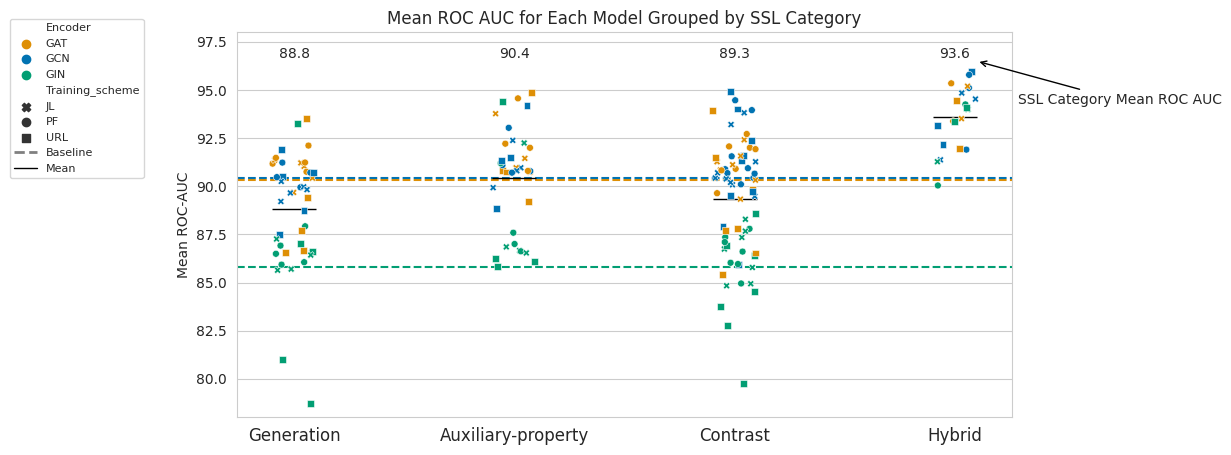

In [40]:
import pandas.core.common as pc

sns.set_style('whitegrid')
# warnings.filterwarnings('ignore', category=pc.SettingWithCopyWarning)    

MARKERS = { scheme: marker for (scheme, marker) in zip(TRAINING_SCHEMES, ['o', 's', 'X'])}
jitter = .10
ENCODER_COLORS = {'GCN': sns.color_palette("colorblind")[0], 'GAT':sns.color_palette("colorblind")[1], 'GIN':sns.color_palette("colorblind")[2]}

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
# ENCODER_COLORS = {
#     'GCN': '#4C72B0',  # Blue
#     'GAT': '#DD8452',  # Orange
#     'GIN': '#55A868',  # Green
# }
ylabel = 'Mean ROC-AUC'

def draw_baselines(ax, **kwargs):
    ax.axhline(y=baseline_means.loc[0]['mean'], linestyle='--', color=ENCODER_COLORS[baseline_means.loc[0]['Baseline_model']], alpha=1, zorder=1, **kwargs)
    ax.axhline(y=baseline_means.loc[1]['mean'], linestyle='--', color=ENCODER_COLORS[baseline_means.loc[1]['Baseline_model']], alpha=1, zorder=1, **kwargs)
    ax.axhline(y=baseline_means.loc[2]['mean'], linestyle='--', color=ENCODER_COLORS[baseline_means.loc[2]['Baseline_model']], alpha=1, zorder=1, **kwargs)

draw_baselines(ax)


x_ticks = []
x_tick_labels = []
dff.loc[:, 'x_jitter'] = np.random.uniform(-jitter, jitter, size=dff.shape[0])
ssl_categories = [GENERATION_BASED_CATEGORY, AUXILIARY_CATEGORY, CONTRAST_BASED, HYBRID_CATEGORY]

for idx, ssl_cat in enumerate(ssl_categories):
    df__cat = dff[(dff.SSL_category == ssl_cat)]
    df__cat.loc[:, 'x_jitter'] += idx
    sns.scatterplot(data=df__cat, x='x_jitter', y='mean', ax=ax, hue='Encoder', style='Training_scheme', 
                    palette=ENCODER_COLORS, markers=MARKERS, alpha=1, s=25, zorder=3).set(ylabel=ylabel)
    x_ticks += [idx]
    x_tick_labels += [ssl_cat]


for ssl_cat, x_pos in zip(ssl_categories, x_ticks):
    y_mean = dff_category_means.loc[dff_category_means['SSL_category'] == ssl_cat, 'mean'].iloc[0]
    ax.hlines(y_mean, x_pos - jitter, x_pos + jitter, color='black', linestyle='-', lw=1, zorder=2)
    ax.annotate(f"{y_mean:.1f}", xy=(x_pos, 96.5), xycoords='data', xytext=(0, 0), textcoords='offset points', fontsize=10, ha='center', va='bottom', zorder=4)
    if ssl_cat == HYBRID_CATEGORY:
        ax.annotate("SSL Category Mean ROC AUC", 
                    xy=(x_pos + 0.1, 96.5), xycoords='data',
                    xytext=(x_pos + 0.75, y_mean + .5), 
                    textcoords='data', fontsize=10, 
                    ha='center', va='bottom', 
                    zorder=4, arrowprops=dict(arrowstyle='->', lw=1, fc='black', ec='black'))


ax.set_xticks(x_ticks)
ax.set_xticklabels(x_tick_labels, fontsize=12)
ax.set_xlabel('')


handles, labels = ax.get_legend_handles_labels()
unique_legend_items = {}
for handle, label in zip(handles, labels):
    if label not in unique_legend_items:
        unique_legend_items[label] = handle


# Create a list with unique legend handles and labels
unique_legend_handles = list(unique_legend_items.values())
unique_legend_labels = list(unique_legend_items.keys())

ax.get_legend().remove()
ax.xaxis.grid(False)
ax.set_ylim([78, 98])

custom_lines = [Line2D([0], [0], color='grey', linestyle='--', lw=2, label='Baseline')]
mean_legend_handles = [Line2D([0], [0], color='black', linestyle='-', lw=1, label='Mean')]

handles, labels = ax.get_legend_handles_labels()
handles = list(unique_legend_handles) + custom_lines + mean_legend_handles
labels = list(unique_legend_labels) + ['Baseline', 'Mean']

ax.legend(handles, labels, loc='upper left', bbox_to_anchor=(-0.3, 1.05), ncol=1, fontsize=8)
ax.set_title('Mean ROC AUC for Each Model Grouped by SSL Category')

In [42]:
df_ssl[
    (df_ssl.Experiment == 'Mode 2/3') &
    ~(df_ssl.SSL_model)    
]

,test_rocauc_ovr,train_downstream_lr,train_pretext_weight,train_pretext_epochs,train_pretext_lr,encoder_in_channels,encoder_hidden_channels,encoder_num_layers,encoder_dropout,encoder_heads,...,temperature,k,B_perc,P_perc,alpha_beta_gamma_weights,ae_loss_weight,fr_loss_weight,er_loss_weight,disagreement_regularization,common_representation_regularization
97943,88.888889,0.01,None,50,0.001,16,16,2,0.3,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97944,97.939101,0.01,None,50,0.001,16,16,2,0.3,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97945,94.700801,0.01,None,50,0.001,16,16,2,0.3,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97946,97.416967,0.01,None,50,0.001,16,16,2,0.3,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97947,87.585172,0.01,None,50,0.001,16,16,2,0.3,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20422354,99.667256,0.01,1,None,NaN,16,16,1,0.5,None,...,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.5
20422355,96.357966,0.01,1,None,NaN,16,16,1,0.5,None,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.5
20422356,98.803267,0.01,1,None,NaN,16,16,1,0.5,None,...,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.3
20422357,90.996273,0.01,1,None,NaN,16,16,1,0.5,None,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.3


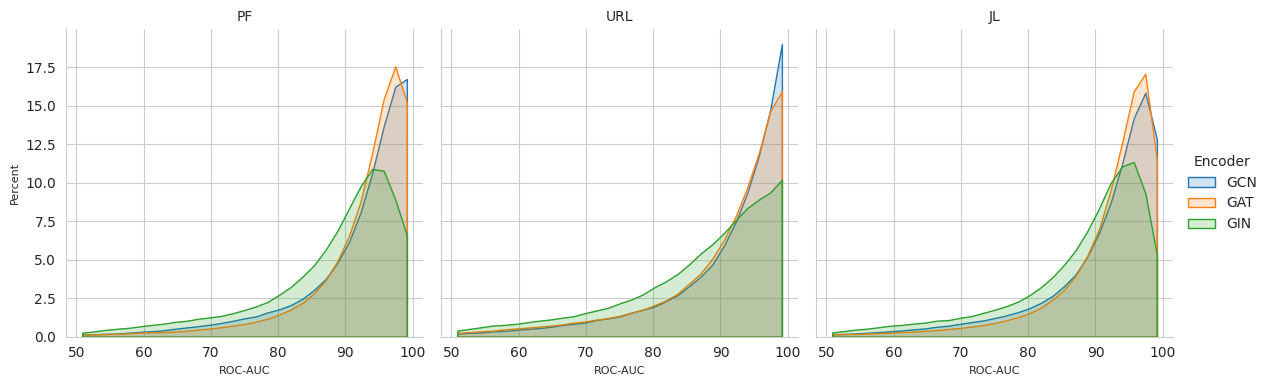

In [39]:
# _, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)
# bins = np.linspace(50, 100, 30)
# for ax, scheme in zip(axs, TRAINING_SCHEMES):
#     df_scheme = df_ssl[query & (df_ssl.Training_scheme == scheme)]
#     sns.histplot(
#         data=df_scheme,
#         x=TEST_METRIC,
#         hue='Encoder',
#         stat='percent',
#         element='poly',
#         fill=True,
#         alpha=.4,
#         bins=bins,
#         palette=ENCODER_COLORS,
#         ax=ax)\
#     .set(xlabel='ROC-AUC', title=scheme)

# legend = axs[0].legend(loc='center left')
# axs[0].add_artist(legend)
# axs[1].get_legend().remove()
# axs[2].get_legend().remove()

g = (
sns.FacetGrid(data=df_ssl[query], hue='Encoder', col='Training_scheme', aspect=1, height=4, col_order=TRAINING_SCHEMES)
    .map(
    sns.histplot, 
    TEST_METRIC,
    stat='percent',
    element='poly',
    fill=True, 
    alpha=0.2,
    bins=np.linspace(50, 100, 30),
    palette=ENCODER_COLORS,
    common_norm=False
    )
.set(xlabel='ROC-AUC')
.set_titles('{col_name}', fontsize=30)
)
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)

g.add_legend()